<a href="https://colab.research.google.com/github/TheJoys2019/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Artin%20Sinani%20-%20DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
# Importing the libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the dataset file
patients = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)

#Renaming the column names here to make some sense of the numbers
patients.columns = ['Age', 'Year of Operation','Positive Aux Nodes','Survival Status']

# Displaying the first 15 rows to give us a better feel for the dataset
patients.head(15)

,Age,Year of Operation,Positive Aux Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [0]:
# Looks like there are no Null values
patients.isnull().sum()


Age                   0
Year of Operation     0
Positive Aux Nodes    0
Survival Status       0
dtype: int64

In [0]:
# Looks like there are no NaN values. 
patients.isna().sum()

Age                   0
Year of Operation     0
Positive Aux Nodes    0
Survival Status       0
dtype: int64

In [0]:
# Looks like the number of instances () and attributes are correct
patients.shape

(306, 4)

In [0]:
# Replaced survival variable is encoded as 1 for surviving >5 years 
# and 2 for not - change this to be 0 for not surviving and 1 for surviving 
#>5 years (0/1 is a more traditional encoding of binary variables)

patients['Survival Status'].replace(to_replace=(1,2), value=(0,1))

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      1
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     1
25     0
26     0
27     0
28     0
29     0
      ..
276    0
277    0
278    0
279    0
280    0
281    1
282    0
283    0
284    0
285    1
286    1
287    0
288    0
289    0
290    0
291    0
292    0
293    1
294    0
295    0
296    0
297    0
298    0
299    1
300    0
301    0
302    0
303    0
304    1
305    1
Name: Survival Status, Length: 306, dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# Checking out the statistics for each column
patients.describe()

,Age,Year of Operation,Positive Aux Nodes,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [0]:
# Let's make some crosstabulations! Fun!
# First CrossFABULOUStions (Get it? Like Fabulous Crosstabulation?)
# Positive Aux Nodes VS Survival Status

# Well that crosstab wasn't so fabulous, let's make it look condensed and sexy next
pd.crosstab(patients['Positive Aux Nodes'], patients['Survival Status'])

Survival Status,1,2
Positive Aux Nodes,,
0,117,19
1,33,8
2,15,5
3,13,7
4,10,3
5,2,4
6,4,3
7,5,2
8,5,2


In [0]:
# Now that looks much sexier and helps us understand the data

PAN_bin = pd.cut(patients['Positive Aux Nodes'],5)
Surv_bin = pd.cut(patients['Survival Status'], 5)

pd.crosstab(PAN_bin, Surv_bin)

Survival Status,"(0.999, 1.2]","(1.2, 1.4]","(1.4, 1.6]","(1.6, 1.8]","(1.8, 2.0]"
Positive Aux Nodes,,,,,
"(-0.052, 10.4]",208,0,0,0,58
"(10.4, 20.8]",11,0,0,0,15
"(20.8, 31.2]",5,0,0,0,6
"(31.2, 41.6]",0,0,0,0,1
"(41.6, 52.0]",1,0,0,0,1


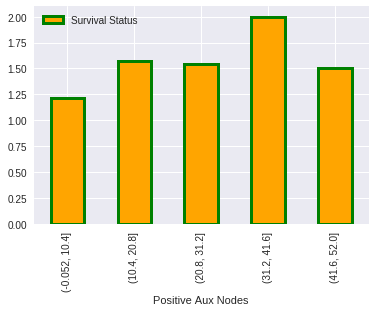

In [0]:
# Let's create a bar graph to make sense of Survival Status

pd.pivot_table(patients, values='Survival Status', index=PAN_bin).plot.bar(color='orange', edgecolor='green', linewidth=3)

In [70]:
# Let's make a crosstab for survival, PAN and Age to analyze 

PAN_SURV = pd.crosstab(PAN_bin, [patients['Survival Status'], patients['Age']], normalize='columns')
print(type(PAN_SURV))
PAN_SURV

<class 'pandas.core.frame.DataFrame'>


Survival Status       1                                                    \
Age                  30   31   33   34   35   36        37        38   39   
Positive Aux Nodes                                                          
(-0.052, 10.4]      1.0  1.0  1.0  0.8  0.5  1.0  0.833333  0.888889  1.0   
(10.4, 20.8]        0.0  0.0  0.0  0.0  0.5  0.0  0.166667  0.111111  0.0   
(20.8, 31.2]        0.0  0.0  0.0  0.2  0.0  0.0  0.000000  0.000000  0.0   
(31.2, 41.6]        0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
(41.6, 52.0]        0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   

Survival Status         ...     2                                               
Age                  40 ...    70   71   72   73   74   75   76   77   78   83  
Positive Aux Nodes      ...                                                     
(-0.052, 10.4]      1.0 ...   1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  
(10.4, 20.8]        0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
(20.8, 31.2]        0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
(31.2, 41.6]        0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
(41.6, 52.0]        0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 98 columns]

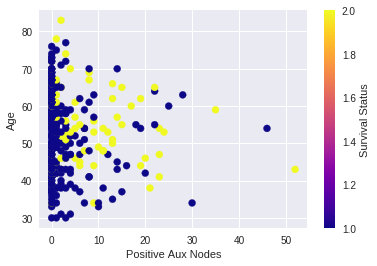

In [73]:
# A Scatterplot to help show the PAN, AGE and Survival Status
plt.scatter('Positive Aux Nodes', 'Age', c = 'Survival Status', cmap="plasma", data=patients)
plt.xlabel("Positive Aux Nodes")
plt.ylabel("Age")
plt.colorbar().set_label('Survival Status')
plt.show()

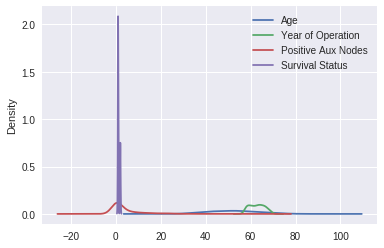

In [78]:
# This doesn't help much
patients.plot.density()

In [60]:
# To remind me what the columns are instead of having to scroll up
patients.columns

Index(['Age', 'Year of Operation', 'Positive Aux Nodes', 'Survival Status'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbd8c8b9e8>,
      dtype=object)

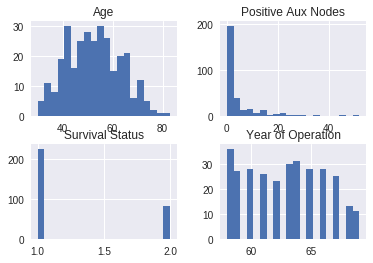

In [66]:
# Histogram of Patients Dataframe To get a better idea of whats going on
patients.hist(bins=20)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1. What is at least one feature that looks to have a positive relationship with survival?
    
 Based on the figure below, we can make the assumption that there is a positive relationship between survival and age when the number of positive auxiliary nodes is less than 10. As positive auxiliary nodes is a lymph node in the arm pit area to which the cancer has spread. The positive relationship between having fewer than 10 PAN.  
 
 As you can tell a regression tends to form as the PAN increases in number and the survival status begins to drop. 
 



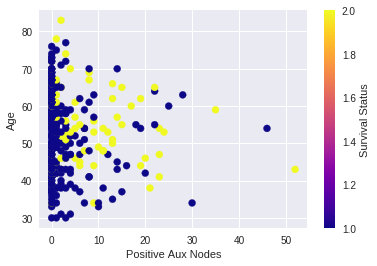

In [68]:
# A Scatter plot to help show the relationship
plt.scatter('Positive Aux Nodes', 'Age', c = 'Survival Status', cmap="plasma", data=patients)
plt.xlabel("Positive Aux Nodes")
plt.ylabel("Age")
plt.colorbar().set_label('Survival Status')
plt.show()

2. What is at least one feature that looks to have a negative relationship with survival?

  A higher age shows to have a negative relationship with survival based on the crosstabulations below:


In [81]:
PAN_SURV = pd.crosstab(PAN_bin, [patients['Survival Status'], patients['Age']], normalize='columns')
print(type(PAN_SURV))
PAN_SURV

<class 'pandas.core.frame.DataFrame'>


Survival Status       1                                                    \
Age                  30   31   33   34   35   36        37        38   39   
Positive Aux Nodes                                                          
(-0.052, 10.4]      1.0  1.0  1.0  0.8  0.5  1.0  0.833333  0.888889  1.0   
(10.4, 20.8]        0.0  0.0  0.0  0.0  0.5  0.0  0.166667  0.111111  0.0   
(20.8, 31.2]        0.0  0.0  0.0  0.2  0.0  0.0  0.000000  0.000000  0.0   
(31.2, 41.6]        0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
(41.6, 52.0]        0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   

Survival Status         ...     2                                               
Age                  40 ...    70   71   72   73   74   75   76   77   78   83  
Positive Aux Nodes      ...                                                     
(-0.052, 10.4]      1.0 ...   1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  
(10.4, 20.8]        0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
(20.8, 31.2]        0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
(31.2, 41.6]        0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
(41.6, 52.0]        0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 98 columns]

In [86]:
age_bin = pd.cut(patients['Age'], 5)
pd.crosstab(PAN_bin, [Surv_bin, age_bin], normalize='columns')

Survival Status      (0.999, 1.2]                                         \
Age                (29.947, 40.6] (40.6, 51.2] (51.2, 61.8] (61.8, 72.4]   
Positive Aux Nodes                                                         
(-0.052, 10.4]           0.897436     0.926471     0.927536     0.930233   
(10.4, 20.8]             0.076923     0.073529     0.028986     0.023256   
(20.8, 31.2]             0.025641     0.000000     0.028986     0.046512   
(31.2, 41.6]             0.000000     0.000000     0.000000     0.000000   
(41.6, 52.0]             0.000000     0.000000     0.014493     0.000000   

Survival Status                     (1.2, 1.4]                            \
Age                (72.4, 83.0] (29.947, 40.6] (40.6, 51.2] (51.2, 61.8]   
Positive Aux Nodes                                                         
(-0.052, 10.4]              1.0            0.0          0.0          0.0   
(10.4, 20.8]                0.0            0.0          0.0          0.0   
(20.8, 31.2]                0.0            0.0          0.0          0.0   
(31.2, 41.6]                0.0            0.0          0.0          0.0   
(41.6, 52.0]                0.0            0.0          0.0          0.0   

Survival Status                                  ...          (1.6, 1.8]  \
Age                (61.8, 72.4] (72.4, 83.0]     ...      (29.947, 40.6]   
Positive Aux Nodes                               ...                       
(-0.052, 10.4]              0.0          0.0     ...                 0.0   
(10.4, 20.8]                0.0          0.0     ...                 0.0   
(20.8, 31.2]                0.0          0.0     ...                 0.0   
(31.2, 41.6]                0.0          0.0     ...                 0.0   
(41.6, 52.0]                0.0          0.0     ...                 0.0   

Survival Status                                                         \
Age                (40.6, 51.2] (51.2, 61.8] (61.8, 72.4] (72.4, 83.0]   
Positive Aux Nodes                                                       
(-0.052, 10.4]              0.0          0.0          0.0          0.0   
(10.4, 20.8]                0.0          0.0          0.0          0.0   
(20.8, 31.2]                0.0          0.0          0.0          0.0   
(31.2, 41.6]                0.0          0.0          0.0          0.0   
(41.6, 52.0]                0.0          0.0          0.0          0.0   

Survival Status        (1.8, 2.0]                                         \
Age                (29.947, 40.6] (40.6, 51.2] (51.2, 61.8] (61.8, 72.4]   
Positive Aux Nodes                                                         
(-0.052, 10.4]               0.75     0.709677     0.703704       0.6875   
(10.4, 20.8]                 0.00     0.193548     0.185185       0.2500   
(20.8, 31.2]                 0.25     0.064516     0.074074       0.0625   
(31.2, 41.6]                 0.00     0.000000     0.037037       0.0000   
(41.6, 52.0]                 0.00     0.032258     0.000000       0.0000   

Survival Status                  
Age                (72.4, 83.0]  
Positive Aux Nodes               
(-0.052, 10.4]              1.0  
(10.4, 20.8]                0.0  
(20.8, 31.2]                0.0  
(31.2, 41.6]                0.0  
(41.6, 52.0]                0.0  

[5 rows x 25 columns]

We can make the assumption that as the age increases the odds of not surviving (0) increases dramatically. 


3. How are those two features related with each other, and what might that mean?

     The correlation between the two features indicates that the increase in age and years of operation indicates that this is the highest correlation in regards to every other feature. This means that as the age increases alongside the year of operation, the likelihood of survival drops. 

In [96]:
np.corrcoef(patients['Age'],patients['Year of Operation'])

array([[1.        , 0.08952945],
       [0.08952945, 1.        ]])